In [21]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import math
from encoders_decoders import *
from losses import *

In [22]:
N = 20
mu0 = torch.arange(0,10,10/N)[None,:]
sigma0 = torch.ones(N)[None,:]
q0 = 1/N*torch.ones(N)[None,:]

#Define data distribution
x_data = torch.distributions.exponential.Exponential(0.5).sample((500,))[:,None]
x_sorted,indices = x_data.sort(dim=0)
x_min,x_max = x_sorted[0,:].item(),x_sorted[-1,:].item() 

encoder = CategoricalEncoder(mu0,sigma0,q0)
decoder = GaussianDecoder(mu0,sigma0,q0)

#Define optimizer and parameters to iterate on
params = list(decoder.parameters()) + list(encoder.parameters())
optimizer = torch.optim.SGD(params,lr=0.001,momentum=0.9)
loss = distortion(x_data, encoder, decoder) + Dkl(x_data, encoder, decoder)

C:\Users\auror\Thesis\encoders_decoders.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  self.q  = torch.nn.Parameter(F.softmax(q0))
C:\Users\auror\Thesis\losses.py:12: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  loss = -((F.softmax(p_j_x))*logq_x_j).sum(dim=1).mean()


In [23]:
loss_tot = []
mse_val = []

for i in range(1,2000):
    running_loss_tot=0
    running_mse=0
   
    loss = distortion(x_data, encoder, decoder) + Dkl(x_data, encoder, decoder)
    mse=MSE(x_data, encoder, decoder)

    optimizer.zero_grad()
    loss.backward()
    
    optimizer.step()
    
    running_loss_tot = loss.item()
    running_mse = mse.item()

    
    loss_tot.append(running_loss_tot)
    mse_val.append(running_mse)
   


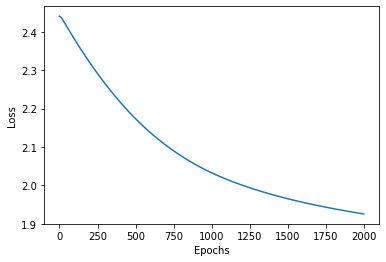

In [24]:
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(loss_tot) 

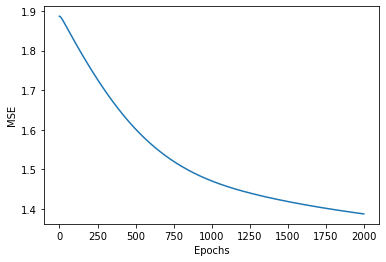

In [25]:
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.plot(mse_val)

# Encoding

<ipython-input-26-9548d405fd28>:4: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  plt.plot(x_sorted,F.softmax(encoder(x_sorted)[:,6]))


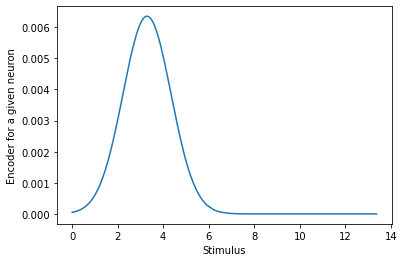

In [26]:
with torch.no_grad():
    plt.xlabel("Stimulus")
    plt.ylabel("Encoder for a given neuron")
    plt.plot(x_sorted,F.softmax(encoder(x_sorted)[:,6]))   

<ipython-input-27-d6e3f776e5d9>:4: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  plt.plot(x_sorted,F.softmax(encoder(x_sorted)[:,:]))


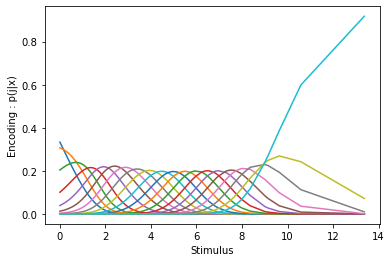

In [27]:
with torch.no_grad():
    plt.xlabel("Stimulus")
    plt.ylabel("Encoding : p(j|x)")
    plt.plot(x_sorted,F.softmax(encoder(x_sorted)[:,:]))   
    

# Decoding

In [28]:
res = GaussianDecoder(mu0,sigma0,q0)
mu_dec, sigma_dec = res(x_sorted)

C:\Users\auror\Thesis\encoders_decoders.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  self.q  = torch.nn.Parameter(F.softmax(q0))


In [29]:
list(mu_dec)


[tensor([0.5696], grad_fn=<UnbindBackward>),
 tensor([0.6856], grad_fn=<UnbindBackward>),
 tensor([0.8730], grad_fn=<UnbindBackward>),
 tensor([1.1714], grad_fn=<UnbindBackward>),
 tensor([1.6260], grad_fn=<UnbindBackward>),
 tensor([2.1472], grad_fn=<UnbindBackward>),
 tensor([2.6794], grad_fn=<UnbindBackward>),
 tensor([3.2036], grad_fn=<UnbindBackward>),
 tensor([3.7194], grad_fn=<UnbindBackward>),
 tensor([4.2456], grad_fn=<UnbindBackward>),
 tensor([4.7864], grad_fn=<UnbindBackward>),
 tensor([5.3278], grad_fn=<UnbindBackward>),
 tensor([5.8583], grad_fn=<UnbindBackward>),
 tensor([6.3796], grad_fn=<UnbindBackward>),
 tensor([6.9018], grad_fn=<UnbindBackward>),
 tensor([7.4290], grad_fn=<UnbindBackward>),
 tensor([7.9569], grad_fn=<UnbindBackward>),
 tensor([8.4800], grad_fn=<UnbindBackward>),
 tensor([9.0019], grad_fn=<UnbindBackward>),
 tensor([9.5930], grad_fn=<UnbindBackward>)]

In [30]:
list(sigma_dec)

[tensor([0.4683], grad_fn=<UnbindBackward>),
 tensor([0.5187], grad_fn=<UnbindBackward>),
 tensor([0.5916], grad_fn=<UnbindBackward>),
 tensor([0.7040], grad_fn=<UnbindBackward>),
 tensor([0.8711], grad_fn=<UnbindBackward>),
 tensor([0.9892], grad_fn=<UnbindBackward>),
 tensor([1.0287], grad_fn=<UnbindBackward>),
 tensor([1.0199], grad_fn=<UnbindBackward>),
 tensor([1.0100], grad_fn=<UnbindBackward>),
 tensor([1.0259], grad_fn=<UnbindBackward>),
 tensor([1.0487], grad_fn=<UnbindBackward>),
 tensor([1.0512], grad_fn=<UnbindBackward>),
 tensor([1.0365], grad_fn=<UnbindBackward>),
 tensor([1.0289], grad_fn=<UnbindBackward>),
 tensor([1.0385], grad_fn=<UnbindBackward>),
 tensor([1.0496], grad_fn=<UnbindBackward>),
 tensor([1.0479], grad_fn=<UnbindBackward>),
 tensor([1.0391], grad_fn=<UnbindBackward>),
 tensor([1.0622], grad_fn=<UnbindBackward>),
 tensor([1.2899], grad_fn=<UnbindBackward>)]

In [31]:
gaussian = torch.distributions.normal.Normal(mu_dec, sigma_dec)

In [32]:
a = (gaussian.log_prob(x_sorted.transpose(0,1))).transpose(0,1)

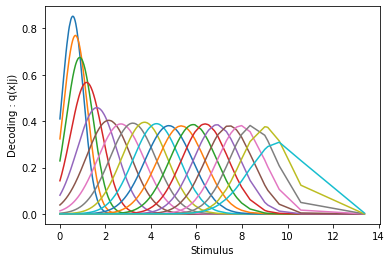

In [33]:
with torch.no_grad():
    plt.plot(x_sorted, torch.exp(a[:,:]))
    plt.xlabel("Stimulus")
    plt.ylabel("Decoding : q(x|j)")
    
    
    

In [34]:
q_sample = torch.squeeze(torch.distributions.categorical.Categorical((F.softmax(decoder.q))).sample((500,)))

<ipython-input-34-023266c519cc>:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  q_sample = torch.squeeze(torch.distributions.categorical.Categorical((F.softmax(decoder.q))).sample((500,)))


In [35]:
muext,sigmaext =decoder(F.one_hot(q_sample).to(dtype=torch.float32))

In [36]:
muext.shape

torch.Size([20, 1])

In [37]:
x_sample = torch.distributions.normal.Normal(muext,sigmaext).sample() 

In [38]:
x_sample.shape

torch.Size([20, 1])

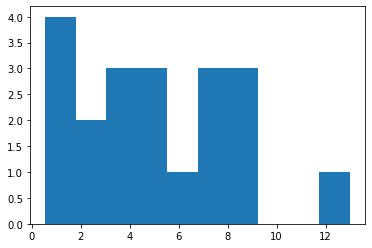

In [39]:
with torch.no_grad():
    
    plt.hist(x_sample.numpy())

# MSE

Computing the loss as Mean Squared Erros + KL Divergence

In [40]:
optimizer = torch.optim.SGD(params,lr=0.001,momentum=0.9)
loss = MSE(x_data, encoder, decoder) + Dkl(x_data, encoder, decoder)

C:\Users\auror\Thesis\losses.py:22: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  mse = ((F.softmax(p_j_x))*(x_data**2 + decoder.mu.transpose(0,1)**2 -2*x_data*decoder.mu.transpose(0,1) + decoder.sigma.transpose(0,1)**2)).sum(dim=1).mean()
C:\Users\auror\Thesis\losses.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  dkl = ((F.softmax(p_j_x))*(F.log_softmax(p_j_x) - F.log_softmax(decoder.q))).sum(dim=1).mean()
C:\Users\auror\Thesis\losses.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  dkl = ((F.softmax(p_j_x))*(F.log_softmax(p_j_x) - F.log_softmax(decoder.q))).sum(dim=1).mean()


In [41]:
loss_val = []

for i in range(1,2000):
    running_loss_tot=0
   
    
    
    loss = MSE(x_data, encoder, decoder) + Dkl(x_data, encoder, decoder)
    optimizer.zero_grad()
    loss.backward()
    
    optimizer.step()
    
    running_loss_tot = loss.item()
    loss_val.append(running_loss_tot)

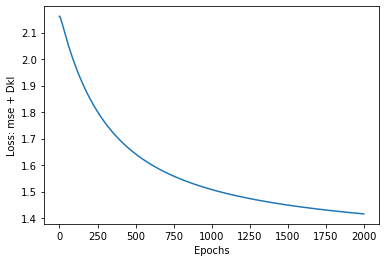

In [43]:
plt.xlabel("Epochs")
plt.ylabel("Loss: mse + Dkl")
plt.plot(loss_val) 


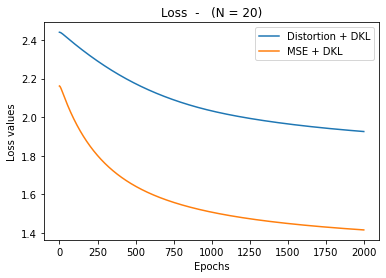

In [47]:
plt.plot(loss_tot, label = "Distortion + DKL")
plt.plot(loss_val, label = "MSE + DKL")
plt.xlabel('Epochs')
plt.ylabel('Loss values')
plt.title('Loss  -  (N = 20)')
plt.legend()

plt.show()